In [1]:
import pandas as pd
import glob
import os
import json
import numpy as np

In [2]:
path = r'../data/movez_nominations' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))
df_nom = pd.concat((pd.read_csv(f,sep=';', header=0) for f in all_files), ignore_index=True)
df_nom

,Child,Wave,Variable,Alter
0,1420,7,GEN_Advice,1422
1,1420,7,GEN_Leader,1429
2,1421,7,GEN_Advice,1428
3,1421,7,GEN_Leader,1425
4,1421,7,GEN_Leader,1429
...,...,...,...,...
199932,2932,3,Di_Modelling_reversed,2927
199933,2932,3,Di_Modelling_reversed,2934
199934,2932,3,Di_Modelling_reversed,2936
199935,2932,3,Di_Modelling_reversed,2938


In [3]:
df_nom['Variable'].nunique(),df_nom['Child'].nunique(),df_nom['Alter'].nunique()

(15, 1477, 3130)

##### Q: why is this significant difference between Child and Alter? Are there this many children that had IDs but were not part of the project? Let's check the intersection between these two set of IDs next

In [4]:
len(set(df_nom['Child'].unique()).intersection(set(df_nom['Alter'].unique())))

1470

In [5]:
participant_IDs = list(set(df_nom['Child'].unique()).intersection(set(df_nom['Alter'].unique())))

In [6]:
len(participant_IDs)

1470

##### Check how it matches the participants file 

In [7]:
df_pp = pd.read_csv('../data/movez_metadata/Participant_Info.csv', sep=';', header=0)
df_pp['Child'].nunique()

1484

In [8]:
len(set(set(df_pp['Child'].unique())).intersection(participant_IDs))

1470

##### Seems like the connections_all file doesn't contain all the possible nomination questions (13 out of 15). Is there any good reason for this?

In [16]:
formula = json.loads(open('../input/connections_all_new.json').read())
max_score = sum(formula.values())
max_score

15

In [17]:
# Non repeating nominations
connections_dict = {}
for child in participant_IDs:
    connections_dict[child] = {}
df_nom = df_nom[df_nom['Child'].isin(participant_IDs)]
# To avoid repetition of nominations from the same alter in different waves
nominations_list = []

for line in df_nom[['Child', 'Alter', 'Variable']].iterrows():
    (ch, nom, var) = line[1]  
    if (ch, nom, var) not in nominations_list:
        connections_dict[ch][nom] = connections_dict[ch].get(nom, 0) + 1*formula[var]
        nominations_list.append((ch, nom, var))

In [28]:
connections_df = pd.DataFrame(connections_dict).fillna(0)
connections_df = connections_df.T

In [29]:
len(connections_dict.keys())

1470

In [30]:
connections_df['total'] = connections_df.sum(axis=1)
connections_df

,900,903,904,907,892,918,921,924,1008,911,...,6177,6181,6162,6178,6164,6179,6180,6183,6174,total
902,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
904,1.0,2.0,0.0,3.0,2.0,7.0,3.0,3.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
907,8.0,5.0,4.0,0.0,6.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0
908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
909,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,6.0,13.0
6181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,25.0
6182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
6183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0,19.0


<AxesSubplot:ylabel='Frequency'>

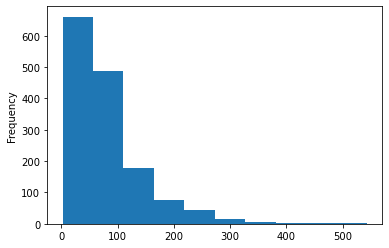

In [31]:
connections_df['total'].plot(kind="hist")

In [22]:
connections_df['total'].describe()

count    1470.000000
mean       79.156463
std        63.119140
min         2.000000
25%        34.000000
50%        62.000000
75%       102.000000
max       543.000000
Name: total, dtype: float64

<AxesSubplot:ylabel='Density'>

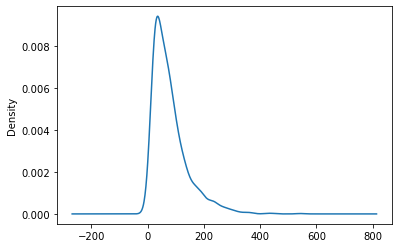

In [23]:
connections_df['total'].plot(kind='kde')

In [24]:
# simple threshold calculation get the 90th percentile of values as influencers

In [25]:
np.percentile(connections_df['total'], 90)

162.10000000000014

In [32]:
# 149 people (out of 1477) have more than 200 nominations
connections_df[connections_df['total'] >= 162]

,900,903,904,907,892,918,921,924,1008,911,...,6177,6181,6162,6178,6164,6179,6180,6183,6174,total
953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235.0
1036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.0
1055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0
1094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0
1102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0
3209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.0
3259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.0
3317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0


In [27]:
influencers_id = list(connections_df[connections_df['total'] >= 162].index)
non_influencers_id = list(connections_df[connections_df['total'] < 162].index)